In [1]:
dataset=[
    ['사과','치즈','생수'],  
    ['생수','호두','치즈','고등어'], 
    ['수박','사과','생수'], 
    ['생수','호두','치즈','옥수수'] 
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_)

In [3]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(생수, 치즈)"
6,0.50,"(생수, 호두)"
7,0.50,"(치즈, 호두)"
8,0.50,"(생수, 치즈, 호두)"


In [4]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
8,"(생수, 치즈)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


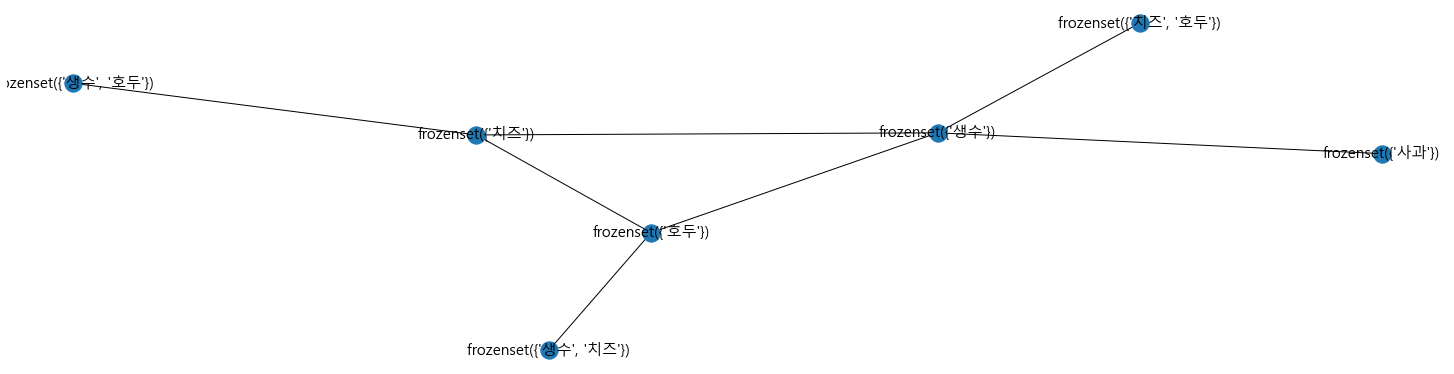

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx

ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,5))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)
